<a href="https://colab.research.google.com/github/DimaKav/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling

In this Sprint Challenge you will use data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the Sprint Challenge!
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html]) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

## Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

## Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [5]:
df = cell_phones.merge(population, how='inner', on=['geo', 'time'])
df.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [7]:
df = df.merge(geo_country_codes[['geo', 'country']])
df.shape

(8590, 5)

## Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:
df['cell_phone_perperson'] = df.cell_phones_total / df.population_total

In [33]:
df['cell_phone_perperson'][(df.country == 'United States') & (df.time == 2017 )]

8134    1.220125
Name: cell_phone_perperson, dtype: float64

Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [36]:
df.geo = df.geo.str.upper()
df.geo.head()

0    AFG
1    AFG
2    AFG
3    AFG
4    AFG
Name: geo, dtype: object

## Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [42]:
import numpy as np
df.describe(include=np.number)

,time,cell_phones_total,population_total,cell_phone_perperson
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [43]:
df.describe(exclude=np.number)

,geo,country
count,8590,8590
unique,195,195
top,EST,Indonesia
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [100]:
df.loc[df.time == 2017, ['country', 'cell_phones_total']].sort_values(
    'cell_phones_total', ascending=False)[0:5]

,country,cell_phones_total
1496,China,"1,474,097,000.0"
3595,India,"1,168,902,277.0"
3549,Indonesia,"458,923,202.0"
8134,United States,"395,881,000.0"
1084,Brazil,"236,488,548.0"


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [114]:
df.loc[(df.cell_phones_total > df.population_total) & (df.country == 'United States'), 
       ['country','time', 'cell_phones_total', 'population_total']].sort_values(
    'time', ascending=False)[0:1]

,country,time,cell_phones_total,population_total
8134,United States,2017,"395,881,000.0",324459463


## Part 4. Reshape data

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [159]:
countries = ['China', 'India', 'United States', 'Indonesia', 'Brazil']
c = df.loc[df['country'].isin(countries)]
t = df[df.time >= 2007]

piv = pd.pivot_table(df, values='cell_phones_total', 
                index=c.country, columns=t.time)
print(piv.shape)
piv

(5, 11)


time,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
country,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


#### OPTIONAL BONUS QUESTION!

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [185]:
diff = piv.diff(axis=1)
diff_t = diff.sum(axis=1)
diff = diff.fillna(0)
diff_t.sort_values(ascending=False)

# India

country
India           935,282,277.0
China           926,791,000.0
Indonesia       365,536,321.0
United States   146,581,000.0
Brazil          115,508,445.0
dtype: float64

If you have the time and curiosity, what other questions can you ask and answer with this data?

1. What variables might affect the increase or decrease in cellphones per year?

In [222]:
df.corr()

,time,cell_phones_total,population_total,cell_phone_perperson
time,1.0,0.19277294532034245,0.050673067452834716,0.7059806546381839
cell_phones_total,0.19277294532034245,1.0,0.6060047451048629,0.2236632251900547
population_total,0.050673067452834716,0.6060047451048629,1.0,0.012532611903030734
cell_phone_perperson,0.7059806546381839,0.2236632251900547,0.012532611903030734,1.0


2. Why do some countries only have certain years?

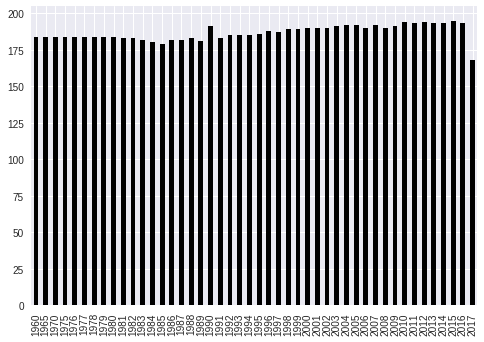

In [228]:
# I would further investigate why some countries only have data for certain years
# and how that might affect any further analyses of our data.

df.time.value_counts().sort_index().plot(kind="bar", color='black');